## Linear Regression

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

#### Import data

In [2]:
data = np.loadtxt(os.path.join(os.getcwd(),'data/ex1data1.txt'), delimiter=',')

In [3]:
X = np.c_[np.ones(data[:, 0].shape[0]), data[:, 0]]
y = np.c_[data[:, 1]]

#### Linear Regression with one variable

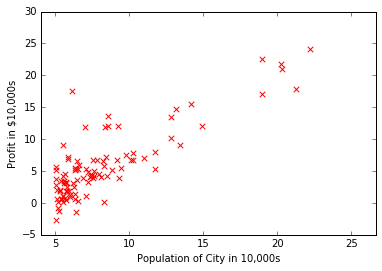

In [4]:
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(min(X[:,1]) - abs(min(X[:,1]))*0.2, max(X[:,1]) + max(X[:,1])*0.2)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

In [5]:
def hypothesis1(theta1, x):
    return list(map(lambda x: x*theta1, X[:,1]))

In [6]:
def error_func(theta1, x, y):    
    error = sum(map(lambda x, y: (x*theta1 - y)**2, x, y))
    return error / (2*len(x))

In [7]:
def bust_optimization(x, y):
    errors = []
    theta1_optimized = 0
    min_error = error_func(theta1_optimized, x, y)
    thetas1 = np.arange(-10, 10, 0.05)
    
    for theta1 in thetas1:
        error = error_func(theta1, x, y)
        errors.append(error)       
        if error < min_error:
            min_error = error
            theta1_optimized = theta1
            
    return theta1_optimized, min_error, thetas1, errors

In [8]:
theta1_optimized, min_error, thetas1, errors = bust_optimization(X[:,1], y)

In [9]:
errors = np.vstack(np.array(errors))
errors = errors.reshape(errors.shape[0])

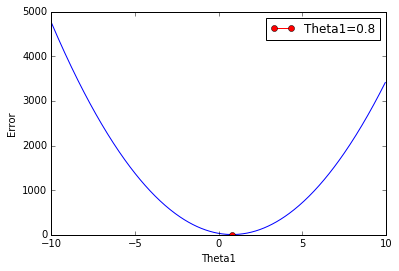

In [10]:
plt.plot(thetas1, errors)
plt.plot(theta1_optimized, min_error, marker='o', color='r', label='Theta1=' + str(theta1_optimized))
plt.xlabel('Theta1')
plt.ylabel('Error')
plt.legend(loc=1);

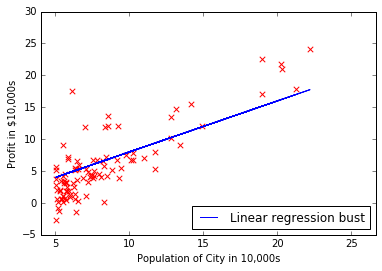

In [11]:
plt.plot(X[:,1], hypothesis1(theta1_optimized, X[:,1]), label='Linear regression bust')
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(min(X[:,1]) - abs(min(X[:,1]))*0.2, max(X[:,1]) + max(X[:,1])*0.2)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);